# An introduction to Natural Language Processing with Python for SEOs

https://www.searchenginejournal.com/natural-language-processing-python-seo/377051/amp/

Colab: https://colab.research.google.com/github/hamletbatista/sej/blob/master/An_Introduction_to_Natural_Language_Processing_with_Python_for_SEOs.ipynb

Tasks:

* Fetch Search Engine Journal XML sitemaps
* Parse URLs to extract the headlines from the slugs
* Extract entity pairs from the headlines
* Extract the corresponding relationships
* Build a knowledge graph 

In [3]:
# ! pip install advertools

In [4]:
import advertools as adv
adv.__version__

'0.10.6'

In [7]:
# downloaded all the linked sitemaps 
sitemap_url = "https://www.searchenginejournal.com/sitemap_index.xml" 
df = adv.sitemap_to_df(sitemap_url)

INFO:root:Getting https://www.searchenginejournal.com/post-sitemap1.xml
INFO:root:Getting https://www.searchenginejournal.com/post-sitemap2.xml
INFO:root:Getting https://www.searchenginejournal.com/post-sitemap3.xml
INFO:root:Getting https://www.searchenginejournal.com/post-sitemap4.xml
INFO:root:Getting https://www.searchenginejournal.com/post-sitemap5.xml
INFO:root:Getting https://www.searchenginejournal.com/post-sitemap6.xml
INFO:root:Getting https://www.searchenginejournal.com/post-sitemap7.xml
INFO:root:Getting https://www.searchenginejournal.com/post-sitemap8.xml
INFO:root:Getting https://www.searchenginejournal.com/post-sitemap9.xml
INFO:root:Getting https://www.searchenginejournal.com/post-sitemap10.xml
INFO:root:Getting https://www.searchenginejournal.com/post-sitemap11.xml
INFO:root:Getting https://www.searchenginejournal.com/post-sitemap12.xml
INFO:root:Getting https://www.searchenginejournal.com/post-sitemap13.xml
INFO:root:Getting https://www.searchenginejournal.com/post-s

# Load data from Sitemap

In [12]:
# select articles by date
df[df['lastmod'] > '2020-01-01']

download_date                    image_caption  \
0     2020-08-18 02:12:47.766146+00:00                              NaN   
17108 2020-08-18 02:12:47.766146+00:00  heading elements and google seo   
17109 2020-08-18 02:12:47.766146+00:00         divi theme vulnerability   
17110 2020-08-18 02:12:47.766146+00:00        How to SEO a Podcast Site   
17111 2020-08-18 02:12:47.766146+00:00           Call Forwarding Detail   
...                                ...                              ...   
18833 2020-08-18 02:12:47.766146+00:00                              NaN   
18834 2020-08-18 02:12:47.766146+00:00                              NaN   
18835 2020-08-18 02:12:47.766146+00:00                              NaN   
18836 2020-08-18 02:12:47.766146+00:00                              NaN   
18837 2020-08-18 02:12:47.766146+00:00                              NaN   

                                               image_loc  \
0                                                    NaN   
17108  https://cdn.searchenginejournal.com/wp-content...   
17109  https://cdn.searchenginejournal.com/wp-content...   
17110  https://cdn.searchenginejournal.com/wp-content...   
17111  https://cdn.searchenginejournal.com/wp-content...   
...                                                  ...   
18833                                                NaN   
18834                                                NaN   
18835                                                NaN   
18836                                                NaN   
18837                                                NaN   

                        image_title                   lastmod  \
0                               NaN 2020-08-18 01:39:11+00:00   
17108           google headings seo 2020-01-03 00:05:53+00:00   
17109      divi theme vulnerability 2020-01-04 06:12:18+00:00   
17110              seo for podcasts 2020-01-06 11:23:40+00:00   
17111  tracking-offline-conversions 2020-01-07 12:45:50+00:00   
...                             ...                       ...   
18833                           NaN 2020-01-15 14:46:02+00:00   
18834                           NaN 2020-01-14 02:32:11+00:00   
18835                           NaN 2020-01-13 04:03:28+00:00   
18836                           NaN 2020-01-06 14:51:35+00:00   
18837                           NaN 2020-01-03 13:49:51+00:00   

                                                     loc news_genres  \
0                   https://www.searchenginejournal.com/         NaN   
17108  https://www.searchenginejournal.com/heading-ta...         NaN   
17109  https://www.searchenginejournal.com/elegant-th...         NaN   
17110  https://www.searchenginejournal.com/google-how...         NaN   
17111  https://www.searchenginejournal.com/track-offl...         NaN   
...                                                  ...         ...   
18833  https://www.searchenginejournal.com/author/ste...         NaN   
18834  https://www.searchenginejournal.com/author/ari...         NaN   
18835  https://www.searchenginejournal.com/author/jon...         NaN   
18836  https://www.searchenginejournal.com/author/chr...         NaN   
18837  https://www.searchenginejournal.com/author/ton...         NaN   

      news_publication_date news_title publication_language publication_name  \
0                       NaN        NaN                  NaN              NaN   
17108                   NaN        NaN                  NaN              NaN   
17109                   NaN        NaN                  NaN              NaN   
17110                   NaN        NaN                  NaN              NaN   
17111                   NaN        NaN                  NaN              NaN   
...                     ...        ...                  ...              ...   
18833                   NaN        NaN                  NaN              NaN   
18834                   NaN        NaN                  NaN              NaN   
18835                   NaN        Na

# Parse links into headlines

In [13]:
from urllib.parse import urlparse
import re

In [24]:
example_url="https://www.searchenginejournal.com/google-be-careful-relying-on-3rd-parties-to-render-website-content/376547/"

# parse the headline
u = urlparse(example_url)
u

ParseResult(scheme='https', netloc='www.searchenginejournal.com', path='/google-be-careful-relying-on-3rd-parties-to-render-website-content/376547/', params='', query='', fragment='')

In [25]:
# split into parts
slug = re.split('[/-]', u.path)
slug

['',
 'google',
 'be',
 'careful',
 'relying',
 'on',
 '3rd',
 'parties',
 'to',
 'render',
 'website',
 'content',
 '376547',
 '']

In [26]:
# join the parts
headline = ' '.join(slug)

# replace unuseful parts
headline = re.sub('\d{6}', '', headline)

# strip whitespaces at the borders
headline = headline.strip()
headline

'google be careful relying on 3rd parties to render website content'

In [39]:
def get_headline(url):

    u = urlparse(url)
    new_headline = ''

    if len(u.path) > 1:

        slug = re.split("[/-]", u.path)

        new_headline = re.sub("\d{6}", ""," ".join(slug)).strip()

    #skip author and category pages

    if not re.match("author|category", new_headline):

        return new_headline

    return ""

In [42]:
# transform the link into a headline
df['headline'] = df['loc'].apply(lambda x: get_headline(x))

In [43]:
df.headline

0                                                         
1        microsoft has opened up a beta version of its ...
2         website usability search engine optimization 258
3        the 5 steps to successfully building a good e ...
4        online advertising drew lower direct response ...
                               ...                        
19693    facebook announces paid online events for smal...
19694    instagram is fighting off fake accounts with i...
19695     facebook messenger merging with instagram direct
19696    google to remain default search engine on firefox
19697                     paid social paid search marriage
Name: headline, Length: 19698, dtype: object

# Extract Named Entities

In [45]:
import spacy
from spacy import displacy

nlp = spacy.load('en_core_web_sm')

In [49]:
# join the Series of headlines into a single string
text = '\n'.join([x for x in df['headline'].tolist() if len(x) > 0])

In [50]:
# instantiate the nlp over the text
doc = nlp(text)

In [54]:
# display the visual Named Entities
displacy.render(doc, style='ent', jupyter=True)

# Building a Knowledge Graph

In [60]:
# print entities
for tok in doc[:100]:
    if tok.dep_ != 'CARDINAL' and tok.dep_!='DATE':
        print(tok.text, '...', tok.dep_)

microsoft ... nsubj
has ... aux
opened ... ROOT
up ... prt
a ... det
beta ... compound
version ... dobj
of ... prep
its ... poss
long ... amod
awaited ... amod
msn ... compound
search ... compound
engine ... pobj
257 ... nummod

 ... 
website ... xcomp
usability ... compound
search ... compound
engine ... compound
optimization ... dobj
258 ... nummod

 ... 
the ... det
5 ... nummod
steps ... nsubj
to ... aux
successfully ... advmod
building ... relcl
a ... det
good ... amod
e ... compound
commerce ... compound
web ... compound
site ... dobj
259 ... nummod

 ... 
online ... amod
advertising ... nsubj
drew ... ccomp
lower ... amod
direct ... amod
response ... compound
rates ... dobj
in ... prep
q4 ... pobj
260 ... nummod

 ... 
google ... compound
cut ... compound
goldman ... compound
sachs ... dobj
from ... prep
ipo ... pobj
516 ... nummod

 ... 
george ... compound
w ... compound
bush ... nsubj
not ... neg
miserable ... conj
failure ... nsubj
says ... ROOT
aol ... nmod
261 ... nummod



In [65]:
# rule-based parser
from spacy.matcher import Matcher
from spacy.tokens import Span
import networkx as nx
import matplotlib.pyplot as plt
from tqdm import tqdm

# from kg_get_entities import get_entities
# from kg_get_relation import get_relation

In [68]:
def get_relation(sent):

    doc = nlp(sent)

    # Matcher class object 
    matcher = Matcher(nlp.vocab)

    #define the pattern 
    pattern = [{'DEP':'ROOT'}, 
            {'DEP':'prep','OP':"?"},
            {'DEP':'agent','OP':"?"},  
            {'POS':'ADJ','OP':"?"}] 

    matcher.add("matching_1", None, pattern) 

    matches = matcher(doc)
    k = len(matches) - 1

    span = doc[matches[k][1]:matches[k][2]] 

    return(span.text)

In [78]:
def get_entities(sent):
    ## chunk 1
    ent1 = ""
    ent2 = ""

    prv_tok_dep = ""    # dependency tag of previous token in the sentence
    prv_tok_text = ""   # previous token in the sentence

    prefix = ""
    modifier = ""

    #############################################################

    for tok in nlp(sent):
        ## chunk 2
        # if token is a punctuation mark then move on to the next token
        if tok.dep_ != "punct":
          # check: token is a compound word or not
            if tok.dep_ == "compound":
                prefix = tok.text
            # if the previous word was also a 'compound' then add the current word to it
                if prv_tok_dep == "compound":
                    prefix = prv_tok_text + " "+ tok.text

          # check: token is a modifier or not
        if tok.dep_.endswith("mod") == True:
            modifier = tok.text
            # if the previous word was also a 'compound' then add the current word to it
            if prv_tok_dep == "compound":
                modifier = prv_tok_text + " "+ tok.text

          ## chunk 3
        if tok.dep_.find("subj") == True:
            ent1 = modifier +" "+ prefix + " "+ tok.text
            prefix = ""
            modifier = ""
            prv_tok_dep = ""
            prv_tok_text = ""      

          ## chunk 4
        if tok.dep_.find("obj") == True:
            ent2 = modifier +" "+ prefix +" "+ tok.text

      ## chunk 5  
      # update variables
        prv_tok_dep = tok.dep_
        prv_tok_text = tok.text
    #############################################################

    return [ent1.strip(), ent2.strip()]

In [79]:
for t in [x for x in df['headline'].tolist() if len(x) > 0][:100]:
    print(get_entities(t))

['microsoft', 'awaited msn search engine']
['', 'search engine optimization']
['', 'good commerce web site']
['online  advertising', 'direct response q4']
['google', 'goldman ipo']
['george w bush', '261']
['', 'small business shipping tools']
['', '']
['', 'crippling internet businesses']
['code validation', 'beginning  xhtml']
['online search engines', 'privacy']
['search engine tool', 'sponsored search engine listings']
['', 'how sasser pc']
['findwhat  espotting', 'search advertising 266']
['search engine title', '']
['googles ipo', 'lycos']
['google adwords', 'chinese language ads']
['search engine optimization', '']
['', '2 2004']
['organic search engine', '']
['google  page', '']
['googles they', '526']
['yahoo search testing', '271']
['it', '']
['kazaa', '']
['local  search', 'online  buyers']
['lycos', 'social search networking']
['yahoo search', 'traffic hotels']
['', 'search toolbar installations']
['', 'open search engine']
['activist ads', 'google adwords']
['', 'rumored  

In [81]:
entity_pairs = []

for i in tqdm([x for x in df["headline"].tolist() if len(x) > 0]):
    entity_pairs.append(get_entities(i))

100%|██████████| 18720/18720 [05:40<00:00, 54.93it/s] 


In [83]:
relations = [get_relation(i) for i in tqdm([x for x in df["headline"].tolist() if len(x) > 0])]
print(relations[10:20])

100%|██████████| 18720/18720 [03:06<00:00, 100.60it/s]

['help', 'tracks', 'remove sasser', 'merge', 'tags', 'gets', 'support chinese', 'copy', 'paid', 'prefer organic']


In [85]:
import pandas as pd
pd.Series(relations).value_counts()[4:50]

facebook      169
ways          126
search        125
use           110
guide         107
marketing     105
adwords        96
rolls          94
introduces     91
get            88
lets           87
launches       86
makes          85
update         82
tips           80
yahoo          76
tools          76
ask            74
gets           68
make           68
updates        65
content        65
are            62
build          59
need           57
says           57
strategy       56
news           56
create         56
know           55
explains       53
ads            50
improve        50
releases       49
bing           49
paid           49
offers         49
find           48
help           47
engine         44
building       44
podcast        43
live           41
increase       41
wants          41
shows          40
dtype: int64

In [86]:
# extract subject

source = [i[0] for i in entity_pairs]

# extract object

target = [i[1] for i in entity_pairs]

kg_df = pd.DataFrame({'source':source, 'target':target, 'edge':relations})

In [87]:
# create a directed-graph from a dataframe

G=nx.from_pandas_edgelist(kg_df, "source", "target",

edge_attr=True, create_using=nx.MultiDiGraph())

In [88]:
plt.figure(figsize=(12,12))

pos = nx.spring_layout(G)

nx.draw(G, with_labels=True, node_color='skyblue', edge_cmap=plt.cm.Blues, pos = pos)

plt.show()

KeyboardInterrupt: 

<Figure size 864x864 with 0 Axes>

In [89]:
def display_graph(relation):

    G=nx.from_pandas_edgelist(kg_df[kg_df['edge']==relation], "source", "target", 

                            edge_attr=True, create_using=nx.MultiDiGraph())

    plt.figure(figsize=(12,12))

    pos = nx.spring_layout(G, k = 0.5) # k regulates the distance between nodes

    nx.draw(G, with_labels=True, node_color='skyblue', node_size=1500, edge_cmap=plt.cm.Blues, pos = pos)

    plt.show()

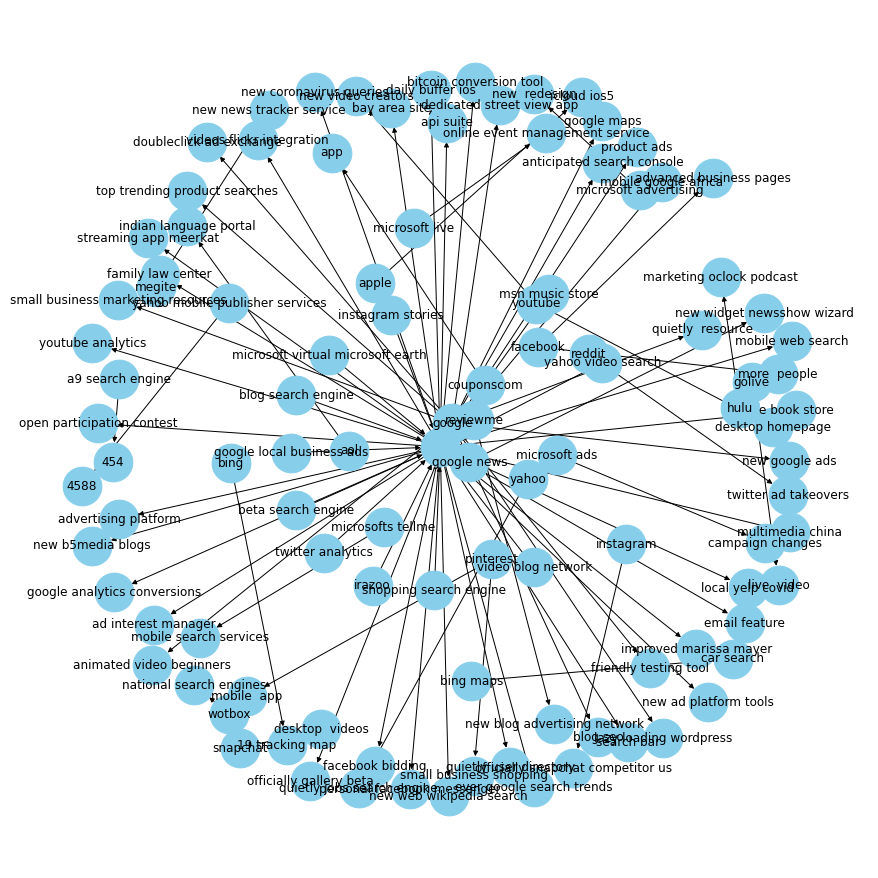

In [90]:
display_graph("launches")

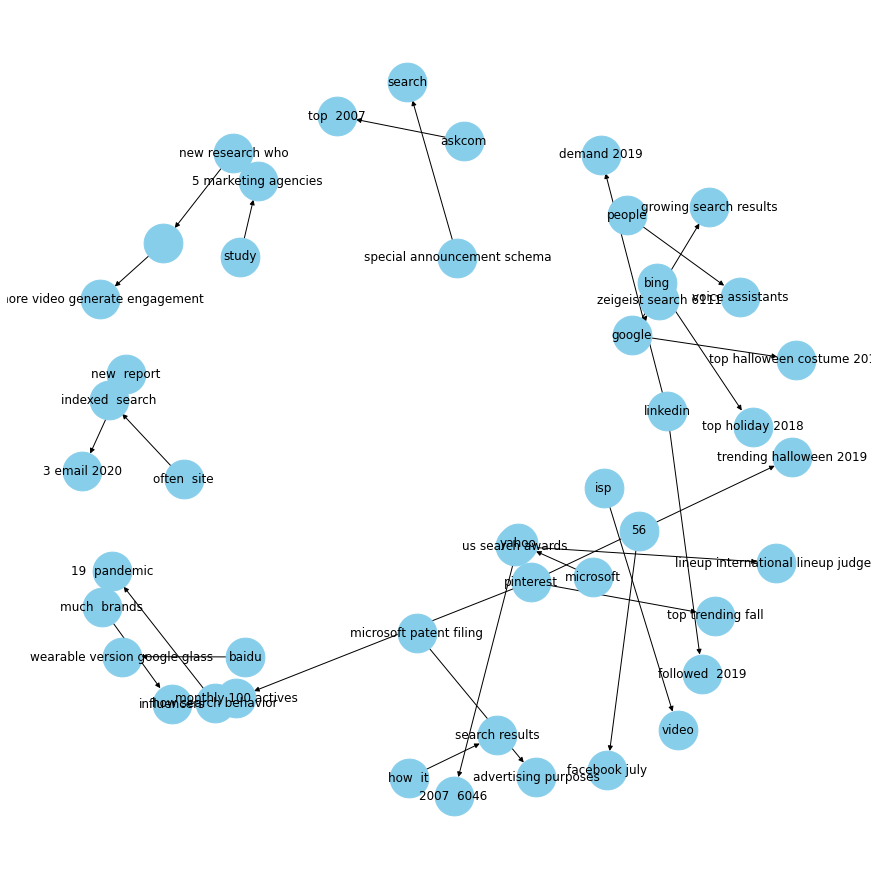

In [91]:
display_graph('reveals')